<a href="https://colab.research.google.com/github/dystaSatria/Deep-Learning/blob/main/Internship%20Projects/DenseNet/DenseNet-ImageClassification-v4/DenseNet121-v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Starting simplified DenseNet121 classification with multiple classifiers on /content/drive/MyDrive/train...
Creating data generators...
Found 8192 images belonging to 4 classes.
Found 2048 images belonging to 4 classes.
Number of classes: 4
Class names: ['Mild Impairment', 'Moderate Impairment', 'No Impairment', 'Very Mild Impairment']

===== Training Standard DenseNet121 Model =====
Epoch 1/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 1166s 4s/step - accuracy: 0.3858 - loss: 1.7477 - val_accuracy: 0.5669 - val_loss: 0.9486
Epoch 2/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 922s 4s/step - accuracy: 0.5988 - loss: 0.9514 - val_accuracy: 0.6128 - val_loss: 0.8963
Epoch 3/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 885s 3s/step - accuracy: 0.6463 - loss: 0.8246 - val_accuracy: 0.5791 - val_loss: 0.9066
Epoch 4/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 858s 3s/step - accuracy: 0.6773 - loss: 0.7561 - val_accuracy: 0.6006 - val_loss: 0.8222
Epoch 5/30
256/256 ━━━━━━━━━━━━━━━━━━━━ 881s 3s/step - accuracy: 0.6862 - loss: 0.7333 - val_acc

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.427236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 260765
[LightGBM] [Info] Number of data points in the train set: 8192, number of used features: 1024
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Skipping CatBoost (not installed or incompatible)
Training AdaBoost classifier...

===== Comparing All Models =====

Metrics for all models:
  accuracy precision  recall      f1      f2      f0 specificity     mcc  \
0   0.6753    0.6464  0.6753  0.6510  0.6637  0.6451      0.8918  0.5747   
1   0.6465    0.6284  0.6465  0.6336  0.6403  0.6296      0.8822  0.5313   
2   0.6113    0.5847  0.6113  0.5953  0.6043  0.5883      0.8704  0.4839   
3   0.6338    0.6137  0.6338  0.6218  0.6285  0.6165      0.8779  0.5132   
4   0.4951    0.5294  0.4951  0.4956  0.4914  0.5114      0.8317  0.3344   
5   0.6299    0.6141  0.6299  0.6199  0.6254  0.6160      0.8766  0.5079   
6   0.6611    0.6429  0.6611  0.6492  0.6557  0.6447      0.8870  0.5503   
7   0.5288    0.5432  0.5288  0.5325  0.5294  0.5380      0.8429  0.3731   

    kappa                            model  
0  0.5671           DenseNet121 (Standard)  
1  0.5286       DenseNet121 + SVM (linear)  
2  0.4818          DenseNet121 + SVM (r

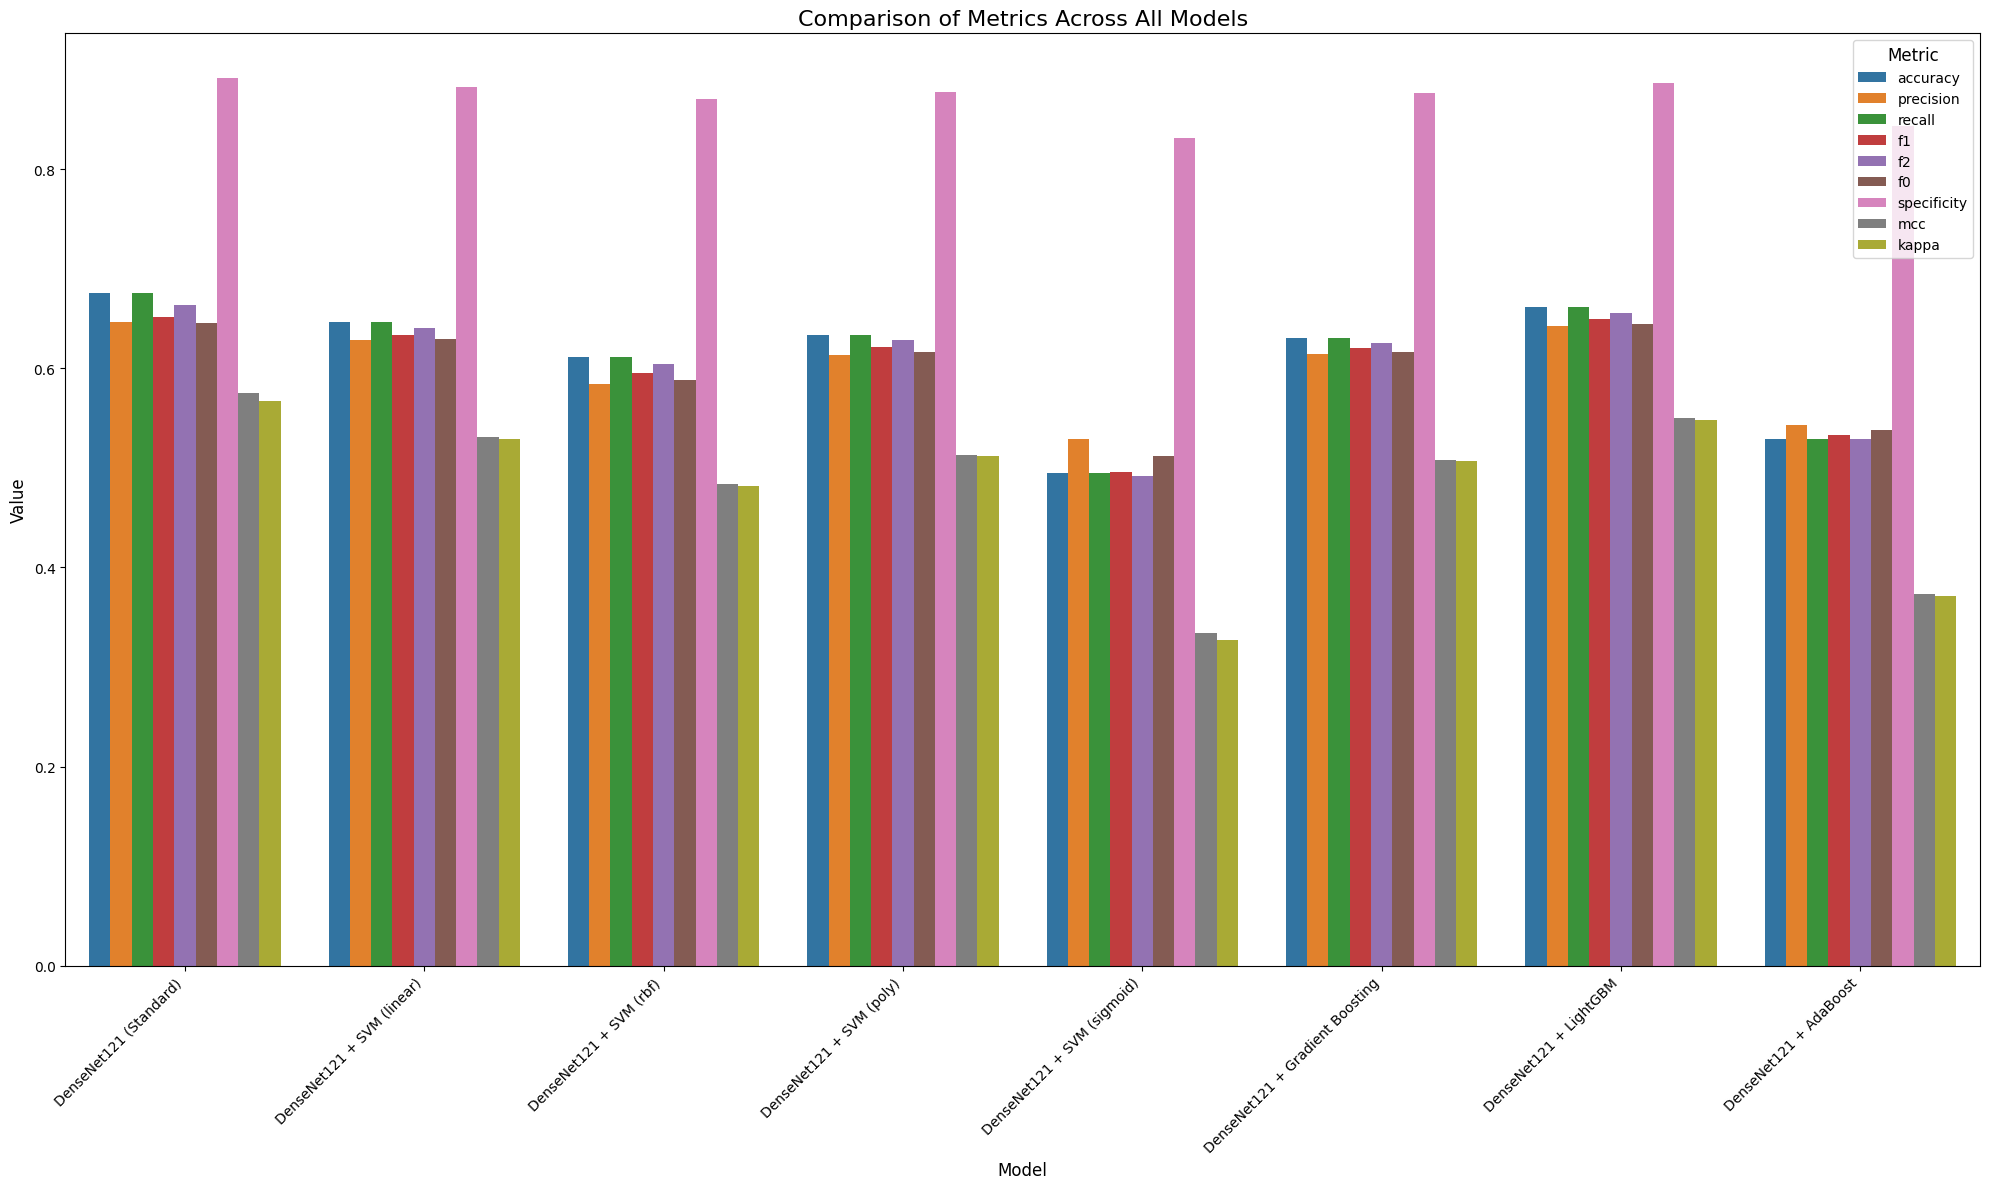

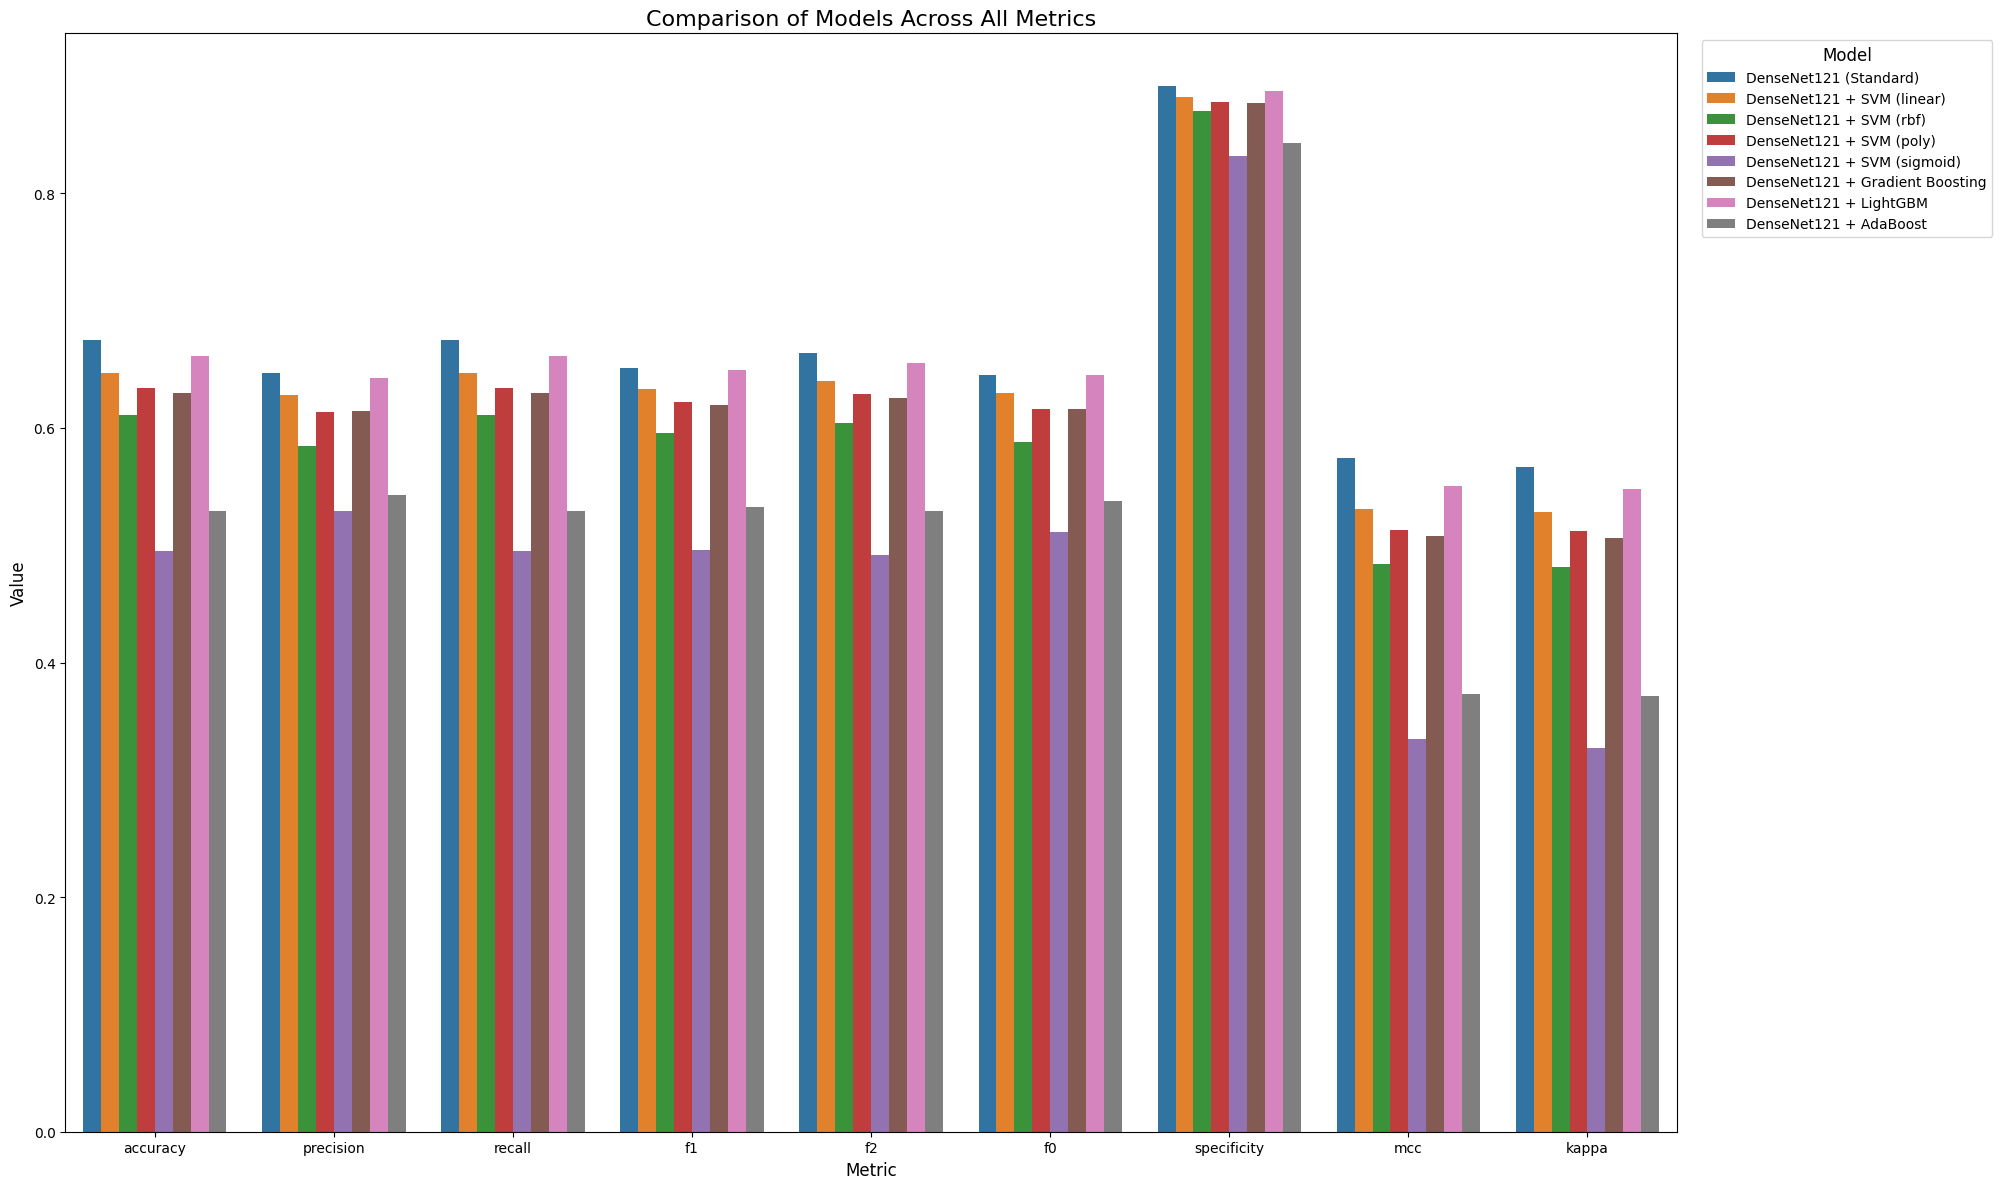


===== Calculating and Plotting ROC Curves =====


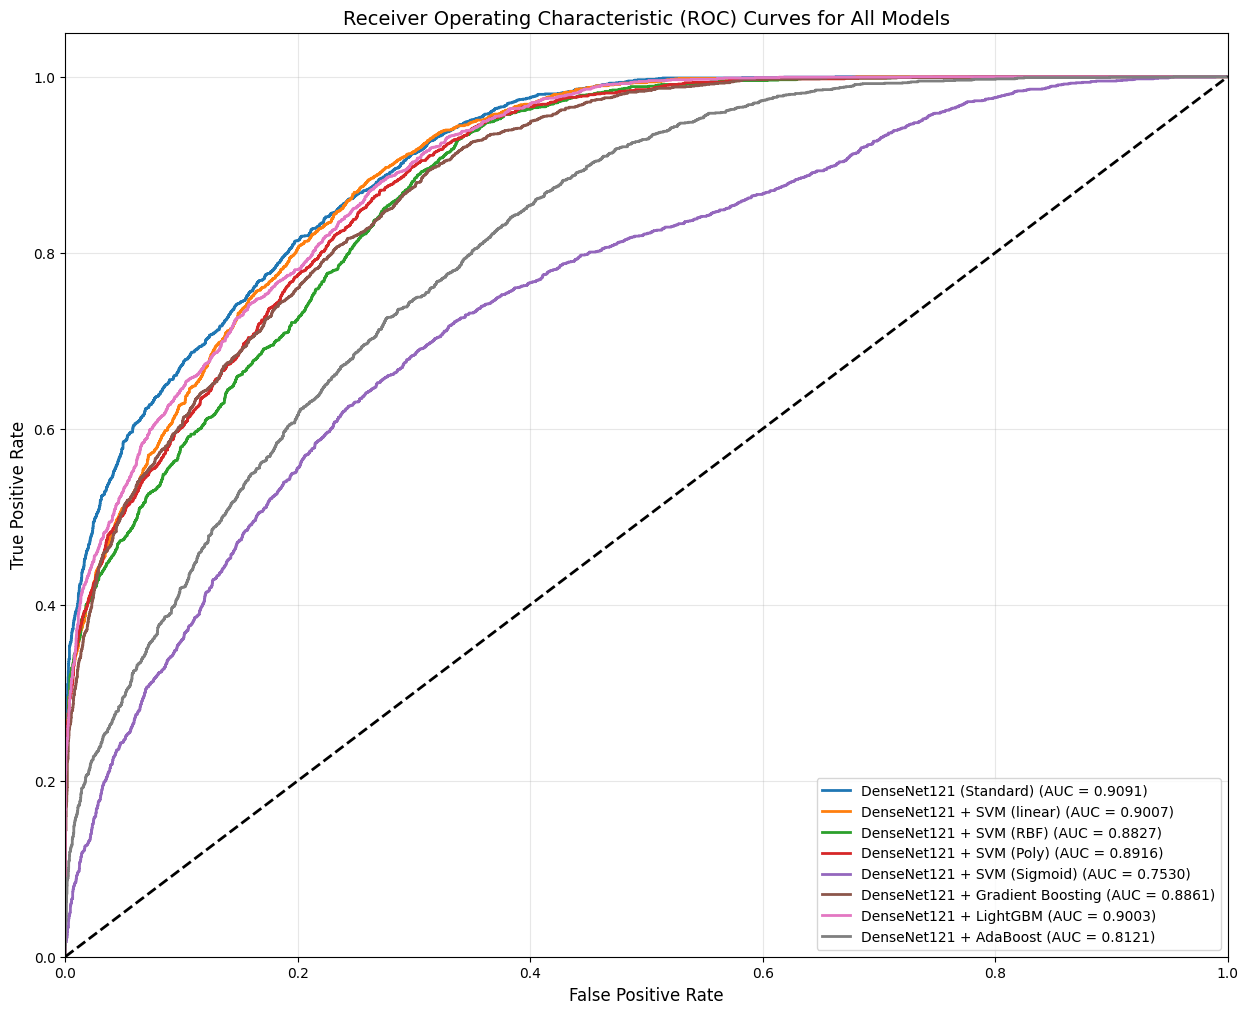


===== ROC AUC Comparison =====
                             Model ROC AUC
0           DenseNet121 (Standard)  0.9091
1       DenseNet121 + SVM (linear)  0.9007
2           DenseNet121 + LightGBM  0.9003
3         DenseNet121 + SVM (Poly)  0.8916
4  DenseNet121 + Gradient Boosting  0.8861
5          DenseNet121 + SVM (RBF)  0.8827
6           DenseNet121 + AdaBoost  0.8121
7      DenseNet121 + SVM (Sigmoid)  0.7530

===== Classification Complete =====


In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, matthews_corrcoef,
    cohen_kappa_score, fbeta_score, roc_curve, auc
)
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.multiclass import OneVsRestClassifier
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import RMSprop  # Changed from Adam to RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# Try to import LightGBM
try:
    import lightgbm as lgbm
    LIGHTGBM_AVAILABLE = True
except ImportError:
    LIGHTGBM_AVAILABLE = False
    print("Warning: LightGBM is not installed. Skipping LightGBM classifier.")

# Try to import CatBoost
try:
    from catboost import CatBoostClassifier
    CATBOOST_AVAILABLE = True
except (ImportError, ValueError) as e:
    CATBOOST_AVAILABLE = False
    print(f"Warning: CatBoost cannot be used. Error: {e}. Skipping CatBoost classifier.")

import random as python_random
np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 30
LEARNING_RATE = 0.0001
VAL_SPLIT = 0.2

# Add specificity metric (not included in sklearn)
def calculate_specificity(y_true, y_pred):
    """Calculate specificity for multi-class classification

    Specificity = TN / (TN + FP)
    """
    cm = confusion_matrix(y_true, y_pred)
    fp = cm.sum(axis=0) - np.diag(cm)
    tn = cm.sum() - (fp + np.diag(cm) + cm.sum(axis=1) - np.diag(cm))
    specificity = np.zeros_like(tn, dtype=float)
    for i in range(len(specificity)):
        if tn[i] + fp[i] > 0:
            specificity[i] = tn[i] / (tn[i] + fp[i])
        else:
            specificity[i] = 0.0

    # Return weighted average specificity
    return np.average(specificity, weights=np.bincount(y_true) if len(np.unique(y_true)) > 1 else None)

# Define metrics calculation function
def calculate_metrics(y_true, y_pred):
    """Calculate all required metrics"""
    metrics = {}

    # Basic metrics
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    metrics['precision'] = precision_score(y_true, y_pred, average='weighted')
    metrics['recall'] = recall_score(y_true, y_pred, average='weighted')

    # F-scores
    metrics['f1'] = f1_score(y_true, y_pred, average='weighted')
    metrics['f2'] = fbeta_score(y_true, y_pred, beta=2, average='weighted')
    metrics['f0'] = fbeta_score(y_true, y_pred, beta=0.5, average='weighted')

    # Specificity - using our custom function
    metrics['specificity'] = calculate_specificity(y_true, y_pred)

    # Advanced metrics
    metrics['mcc'] = matthews_corrcoef(y_true, y_pred)
    metrics['kappa'] = cohen_kappa_score(y_true, y_pred)

    return metrics

# Function to extract features from DenseNet121
def create_feature_extractor():
    # Load the DenseNet121 with pre-trained weights
    base_model = DenseNet121(
        weights='imagenet',
        include_top=False,
        input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
    )

    # Freeze all base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add global pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # Create model
    model = Model(inputs=base_model.input, outputs=x)

    return model

# Function to extract features from generators
def extract_features(feature_extractor, data_generator):
    features = []
    labels = []

    # Extract features for all batches
    num_batches = len(data_generator)
    for i in range(num_batches):
        x_batch, y_batch = data_generator[i]
        batch_features = feature_extractor.predict(x_batch, verbose=0)
        features.append(batch_features)
        labels.append(np.argmax(y_batch, axis=1))

    # Concatenate features and labels
    features = np.concatenate(features, axis=0)
    labels = np.concatenate(labels, axis=0)

    return features, labels

# Modified DenseNet121 model building function with ReLU activation and 1024 neurons in Dense layer
def build_densenet_model(num_classes):
    # Load the DenseNet121 with pre-trained weights
    base_model = DenseNet121(
        weights='imagenet',
        include_top=False,
        input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)
    )

    # Freeze all base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add classification layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # Changed Dense layer to 1024 neurons with explicitly using ReLU activation
    x = Dense(1024, activation='relu')(x)  # Changed from 256 to 1024 as requested
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile with RMSprop optimizer and specified learning rate
    model.compile(
        optimizer=RMSprop(learning_rate=LEARNING_RATE),  # Changed from Adam to RMSprop
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Simplified training function
def fast_train(model, train_generator, validation_generator):
    # Early stopping to prevent overfitting
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=5,  # Increased patience due to increased epochs
        restore_best_weights=True
    )

    # Train with modified epochs
    history = model.fit(
        train_generator,
        validation_data=validation_generator,
        epochs=EPOCHS,  # Now using 30 epochs as requested
        callbacks=[early_stop],
        verbose=1
    )

    return model, history

# Evaluate and get predictions for baseline DenseNet121
def evaluate_densenet(model, test_generator):
    # Get predictions
    y_pred_prob = model.predict(test_generator, verbose=1)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = test_generator.classes

    # Calculate metrics
    metrics = calculate_metrics(y_true, y_pred)

    return metrics, y_true, y_pred, y_pred_prob

# Function to train and evaluate SVM classifier with different kernels
def train_and_evaluate_svm(train_features, train_labels, test_features, test_labels, kernel='linear'):
    print(f"Training SVM with {kernel} kernel...")

    # Create and train SVM classifier
    svm = SVC(kernel=kernel, probability=True, random_state=42)
    svm.fit(train_features, train_labels)

    # Get predictions
    y_pred = svm.predict(test_features)
    y_pred_prob = svm.predict_proba(test_features)

    # Calculate metrics
    metrics = calculate_metrics(test_labels, y_pred)

    # Add model name to metrics
    metrics['model'] = f"DenseNet121 + SVM ({kernel})"

    return metrics, y_pred, y_pred_prob

# Function to train and evaluate GradientBoosting
def train_and_evaluate_gradient_boosting(train_features, train_labels, test_features, test_labels):
    print("Training Gradient Boosting classifier...")

    # Create and train GradientBoosting classifier
    gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
    gb.fit(train_features, train_labels)

    # Get predictions
    y_pred = gb.predict(test_features)
    y_pred_prob = gb.predict_proba(test_features)

    # Calculate metrics
    metrics = calculate_metrics(test_labels, y_pred)

    # Add model name to metrics
    metrics['model'] = "DenseNet121 + Gradient Boosting"

    return metrics, y_pred, y_pred_prob

# Function to train and evaluate LightGBM
def train_and_evaluate_lightgbm(train_features, train_labels, test_features, test_labels):
    print("Training LightGBM classifier...")

    # Create and train LightGBM classifier
    lgb = lgbm.LGBMClassifier(n_estimators=100, random_state=42)
    lgb.fit(train_features, train_labels)

    # Get predictions
    y_pred = lgb.predict(test_features)
    y_pred_prob = lgb.predict_proba(test_features)

    # Calculate metrics
    metrics = calculate_metrics(test_labels, y_pred)

    # Add model name to metrics
    metrics['model'] = "DenseNet121 + LightGBM"

    return metrics, y_pred, y_pred_prob

# Function to train and evaluate CatBoost
def train_and_evaluate_catboost(train_features, train_labels, test_features, test_labels):
    print("Training CatBoost classifier...")

    # Check if CatBoost is actually available at runtime
    if 'CatBoostClassifier' not in globals():
        print("Error: CatBoostClassifier is not available. Cannot proceed with CatBoost training.")
        # Return dummy metrics with zeros
        metrics = {
            'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0,
            'f2': 0, 'f0': 0, 'specificity': 0, 'mcc': 0, 'kappa': 0,
            'model': "DenseNet121 + CatBoost (FAILED)"
        }
        return metrics, None, None

    try:
        # Create and train CatBoost classifier with verbose=0 to reduce output
        # and iterations=100 for faster training
        cb = CatBoostClassifier(
            iterations=100,
            learning_rate=0.1,
            depth=6,
            loss_function='MultiClass',
            random_seed=42,
            verbose=0
        )
        cb.fit(train_features, train_labels)

        # Get predictions
        y_pred = cb.predict(test_features)
        y_pred_prob = cb.predict_proba(test_features)

        # Calculate metrics
        metrics = calculate_metrics(test_labels, y_pred)

        # Add model name to metrics
        metrics['model'] = "DenseNet121 + CatBoost"

        return metrics, y_pred, y_pred_prob

    except Exception as e:
        print(f"Error during CatBoost training/evaluation: {e}")
        # Return dummy metrics with zeros
        metrics = {
            'accuracy': 0, 'precision': 0, 'recall': 0, 'f1': 0,
            'f2': 0, 'f0': 0, 'specificity': 0, 'mcc': 0, 'kappa': 0,
            'model': "DenseNet121 + CatBoost "
        }
        return metrics, None, None

# Function to train and evaluate AdaBoost
def train_and_evaluate_adaboost(train_features, train_labels, test_features, test_labels):
    print("Training AdaBoost classifier...")

    # Create and train AdaBoost classifier
    ada = AdaBoostClassifier(n_estimators=100, random_state=42)
    ada.fit(train_features, train_labels)

    # Get predictions
    y_pred = ada.predict(test_features)
    y_pred_prob = ada.predict_proba(test_features)

    # Calculate metrics
    metrics = calculate_metrics(test_labels, y_pred)

    # Add model name to metrics
    metrics['model'] = "DenseNet121 + AdaBoost"

    return metrics, y_pred, y_pred_prob

# Function to calculate and plot ROC curves
def calculate_and_plot_roc(all_models_results, class_names, num_classes):
    plt.figure(figsize=(15, 12))

    # Store ROC AUC values for all models
    roc_aucs = {}

    # For each model
    for model_name, model_data in all_models_results.items():
        y_true = model_data['y_true']
        y_prob = model_data['y_prob']

        # Calculate ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        # One-hot encode the labels for ROC calculation
        y_true_bin = np.zeros((len(y_true), num_classes))
        for i in range(len(y_true)):
            y_true_bin[i, y_true[i]] = 1

        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_prob.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Store the micro-average ROC AUC
        roc_aucs[model_name] = roc_auc["micro"]

        # Plot ROC curve
        plt.plot(fpr["micro"], tpr["micro"],
                 label=f'{model_name} (AUC = {roc_auc["micro"]:.4f})',
                 linewidth=2)

    # Plot diagonal line
    plt.plot([0, 1], [0, 1], 'k--', linewidth=2)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic (ROC) Curves for All Models', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.savefig('roc_curves_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Create ROC AUC comparison table
    roc_df = pd.DataFrame({
        'Model': list(roc_aucs.keys()),
        'ROC AUC': [f"{v:.4f}" for v in roc_aucs.values()]
    })

    # Sort by ROC AUC
    roc_df = roc_df.sort_values('ROC AUC', ascending=False).reset_index(drop=True)

    # Save to CSV
    roc_df.to_csv('roc_auc_comparison.csv', index=False)

    # Display ROC AUC comparison
    print("\n===== ROC AUC Comparison =====")
    print(roc_df)

    return roc_df

# Function to visualize all metrics in a comparative chart
def visualize_metrics(all_metrics_df):
    # Melt the dataframe for easier plotting
    melted_df = pd.melt(all_metrics_df, id_vars=['model'],
                         value_vars=['accuracy', 'precision', 'recall', 'f1', 'f2', 'f0',
                                    'specificity', 'mcc', 'kappa'],
                         var_name='metric', value_name='value')

    # Plot metrics by model
    plt.figure(figsize=(20, 12))
    sns.barplot(x='model', y='value', hue='metric', data=melted_df)
    plt.title('Comparison of Metrics Across All Models', fontsize=16)
    plt.xlabel('Model', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Metric', title_fontsize=12, fontsize=10, loc='upper right')
    plt.tight_layout()
    plt.savefig('metrics_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Plot metrics by metric type
    plt.figure(figsize=(20, 12))
    sns.barplot(x='metric', y='value', hue='model', data=melted_df)
    plt.title('Comparison of Models Across All Metrics', fontsize=16)
    plt.xlabel('Metric', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend(title='Model', title_fontsize=12, fontsize=10, loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.tight_layout()
    plt.savefig('models_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# Main execution function
def run_simplified_classification(data_folder):
    print(f"Starting simplified DenseNet121 classification with multiple classifiers on {data_folder}...")

    # Check if data folder exists
    if not os.path.exists(data_folder):
        print(f"Error: Data folder '{data_folder}' not found.")
        return None

    # Create data generators with simpler augmentation
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        validation_split=VAL_SPLIT
    )

    # Check folder structure
    if os.path.exists(os.path.join(data_folder, 'train')):
        # Has train/test structure
        train_folder = os.path.join(data_folder, 'train')
        test_folder = os.path.join(data_folder, 'test') if os.path.exists(os.path.join(data_folder, 'test')) else None
    else:
        # Single folder with class subfolders
        train_folder = data_folder
        test_folder = None

    # Create generators
    print("Creating data generators...")
    train_generator = datagen.flow_from_directory(
        train_folder,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,  # Now using 32 as requested
        class_mode='categorical',
        shuffle=True,
        subset='training'
    )

    validation_generator = datagen.flow_from_directory(
        train_folder,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,  # Now using 32 as requested
        class_mode='categorical',
        shuffle=False,
        subset='validation'
    )

    # For test data
    if test_folder:
        test_datagen = ImageDataGenerator(rescale=1./255)
        test_generator = test_datagen.flow_from_directory(
            test_folder,
            target_size=IMAGE_SIZE,
            batch_size=BATCH_SIZE,  # Now using 32 as requested
            class_mode='categorical',
            shuffle=False
        )
    else:
        # Use validation data as test data
        test_generator = validation_generator

    # Get class names and number of classes
    class_names = list(train_generator.class_indices.keys())
    num_classes = len(class_names)
    print(f"Number of classes: {num_classes}")
    print(f"Class names: {class_names}")

    # 1. Train the standard DenseNet121 model
    print("\n===== Training Standard DenseNet121 Model =====")
    model = build_densenet_model(num_classes)
    model, history = fast_train(model, train_generator, validation_generator)
    densenet_metrics, y_true, y_pred, y_pred_prob = evaluate_densenet(model, test_generator)
    densenet_metrics['model'] = "DenseNet121 (Standard)"

    # Store all metrics for comparison
    all_metrics = [densenet_metrics]

    # Store all model results for ROC curves
    all_models_results = {
        "DenseNet121 (Standard)": {
            "y_true": y_true,
            "y_prob": y_pred_prob
        }
    }

    # 2. Create feature extractor and extract features
    print("\n===== Extracting Features from DenseNet121 =====")
    feature_extractor = create_feature_extractor()

    # Reset generators to the beginning
    train_generator.reset()
    validation_generator.reset()
    test_generator.reset()

    # Extract features
    print("Extracting training features...")
    train_features, train_labels = extract_features(feature_extractor, train_generator)
    print(f"Training features shape: {train_features.shape}")

    print("Extracting validation features...")
    val_features, val_labels = extract_features(feature_extractor, validation_generator)
    print(f"Validation features shape: {val_features.shape}")

    print("Extracting test features...")
    test_features, test_labels = extract_features(feature_extractor, test_generator)
    print(f"Test features shape: {test_features.shape}")

    # 3. Train and evaluate SVM with different kernels
    print("\n===== Training and Evaluating SVMs with Different Kernels =====")

    # SVM with Linear kernel
    svm_linear_metrics, svm_linear_pred, svm_linear_prob = train_and_evaluate_svm(
        train_features, train_labels, test_features, test_labels, kernel='linear'
    )
    all_metrics.append(svm_linear_metrics)
    all_models_results["DenseNet121 + SVM (linear)"] = {
        "y_true": test_labels,
        "y_prob": svm_linear_prob
    }

    # SVM with RBF kernel
    svm_rbf_metrics, svm_rbf_pred, svm_rbf_prob = train_and_evaluate_svm(
        train_features, train_labels, test_features, test_labels, kernel='rbf'
    )
    all_metrics.append(svm_rbf_metrics)
    all_models_results["DenseNet121 + SVM (RBF)"] = {
        "y_true": test_labels,
        "y_prob": svm_rbf_prob
    }

    # SVM with Polynomial kernel
    svm_poly_metrics, svm_poly_pred, svm_poly_prob = train_and_evaluate_svm(
        train_features, train_labels, test_features, test_labels, kernel='poly'
    )
    all_metrics.append(svm_poly_metrics)
    all_models_results["DenseNet121 + SVM (Poly)"] = {
        "y_true": test_labels,
        "y_prob": svm_poly_prob
    }

    # SVM with Sigmoid kernel
    svm_sigmoid_metrics, svm_sigmoid_pred, svm_sigmoid_prob = train_and_evaluate_svm(
        train_features, train_labels, test_features, test_labels, kernel='sigmoid'
    )
    all_metrics.append(svm_sigmoid_metrics)
    all_models_results["DenseNet121 + SVM (Sigmoid)"] = {
        "y_true": test_labels,
        "y_prob": svm_sigmoid_prob
    }

    # 4. Train and evaluate boosting methods
    print("\n===== Training and Evaluating Boosting Methods =====")

    # Gradient Boosting
    gb_metrics, gb_pred, gb_prob = train_and_evaluate_gradient_boosting(
        train_features, train_labels, test_features, test_labels
    )
    all_metrics.append(gb_metrics)
    all_models_results["DenseNet121 + Gradient Boosting"] = {
        "y_true": test_labels,
        "y_prob": gb_prob
    }

    # LightGBM (if available)
    if LIGHTGBM_AVAILABLE:
        lgbm_metrics, lgbm_pred, lgbm_prob = train_and_evaluate_lightgbm(
            train_features, train_labels, test_features, test_labels
        )
        all_metrics.append(lgbm_metrics)
        all_models_results["DenseNet121 + LightGBM"] = {
            "y_true": test_labels,
            "y_prob": lgbm_prob
        }
    else:
        print("Skipping LightGBM (not installed)")

    # CatBoost (if available)
    if CATBOOST_AVAILABLE:
        catboost_metrics, catboost_pred, catboost_prob = train_and_evaluate_catboost(
            train_features, train_labels, test_features, test_labels
        )
        all_metrics.append(catboost_metrics)

        # Only add to ROC comparison if we have valid predictions
        if catboost_prob is not None:
            all_models_results["DenseNet121 + CatBoost"] = {
                "y_true": test_labels,
                "y_prob": catboost_prob
            }
    else:
        print("Skipping CatBoost (not installed or incompatible)")

    # AdaBoost
    ada_metrics, ada_pred, ada_prob = train_and_evaluate_adaboost(
        train_features, train_labels, test_features, test_labels
    )
    all_metrics.append(ada_metrics)
    all_models_results["DenseNet121 + AdaBoost"] = {
        "y_true": test_labels,
        "y_prob": ada_prob
    }

    # 5. Compare all models
    print("\n===== Comparing All Models =====")

    # Create dataframe with all metrics
    all_metrics_df = pd.DataFrame(all_metrics)

    # Format metrics to 4 decimal places
    for col in ['accuracy', 'precision', 'recall', 'f1', 'f2', 'f0', 'specificity', 'mcc', 'kappa']:
        all_metrics_df[col] = all_metrics_df[col].map(lambda x: f"{x:.4f}")

    # Display metrics
    print("\nMetrics for all models:")
    print(all_metrics_df)

    # Save to CSV
    all_metrics_df.to_csv('all_models_metrics.csv', index=False)
    print("Metrics saved to 'all_models_metrics.csv'")

    # 6. Visualize metrics
    print("\n===== Visualizing Metrics =====")

    # Convert string metrics back to float for visualization
    for col in ['accuracy', 'precision', 'recall', 'f1', 'f2', 'f0', 'specificity', 'mcc', 'kappa']:
        all_metrics_df[col] = all_metrics_df[col].astype(float)

    # Create visualizations
    visualize_metrics(all_metrics_df)

    # 7. Calculate and plot ROC curves
    print("\n===== Calculating and Plotting ROC Curves =====")
    roc_df = calculate_and_plot_roc(all_models_results, class_names, num_classes)

    print("\n===== Classification Complete =====")

    return all_metrics_df, roc_df

# Usage example:
if __name__ == "__main__":
    # Replace with your dataset path
    DATA_FOLDER = "/content/drive/MyDrive/train"

    # Run the simplified classification
    metrics_df, roc_df = run_simplified_classification(DATA_FOLDER)